In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
255,1147,0,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
232,1124,0,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S
283,1175,1,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C
82,974,0,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S


# Check the values which value is which

In [12]:
df.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [36]:
df.isnull().sum() # check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
df.duplicated().sum() # check for duplicates


0

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64']) # select only the numerical columns from the dataframe
# Calculate the correlation
correlation = numerical_df.corr()['Survived']
print(correlation)

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.000013
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Name: Survived, dtype: float64


In [ ]:
df.describe() # check for outliers , outliners are basically the values that are far from the mean , 
#vin other words the values that are not in the range of 1.5 * IQR(detemined by the box plot) box plot is a good way to visualize the outliers

#75% over here is the 75th percentile , which means 75% of the data is below this value

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
df.duplicated().sum() # check for duplicates

0

<Axes: xlabel='Survived', ylabel='count'>

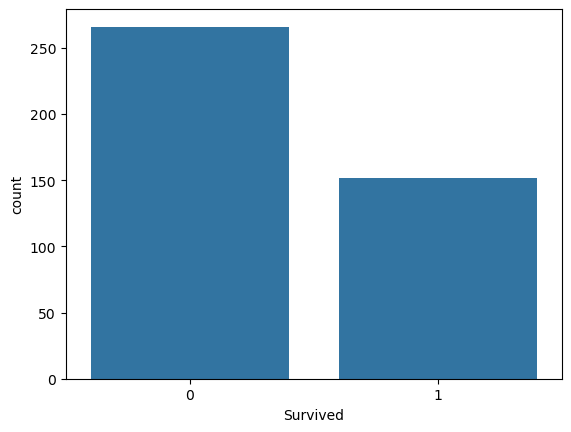

In [15]:
sns.countplot(x='Survived', data=df) # countplot is used to count the number of occurances of a particular value in a column

<Axes: xlabel='Survived'>

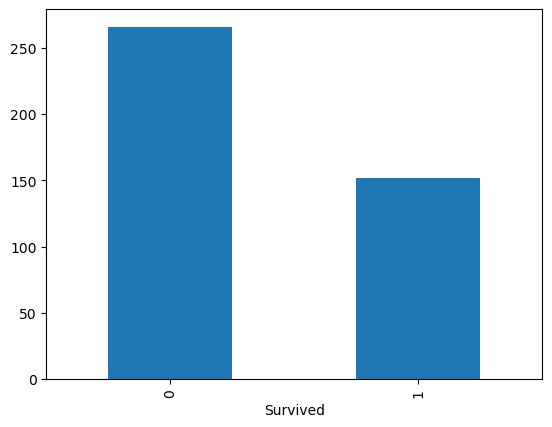

In [17]:
df['Survived'].value_counts().plot(kind='bar') # another way to plot the count of a particular value in a column

<Axes: ylabel='count'>

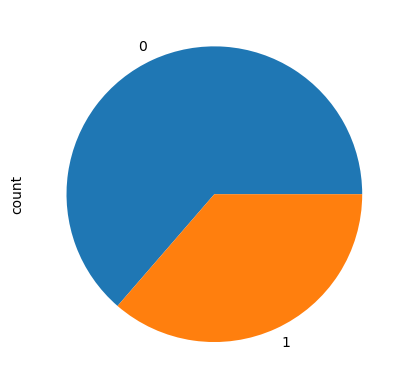

In [18]:
df['Survived'].value_counts().plot(kind='pie') # pie chart

<Axes: ylabel='count'>

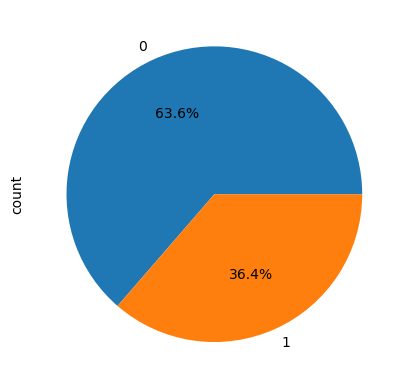

In [19]:
# for percentage in pie chart
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%') # autopct is used to show the percentage in the pie chart 
#'%1.1f%%' is used to show the percentage upto 1 decimal place example 38.4%

# Numerical Data -> continous data

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

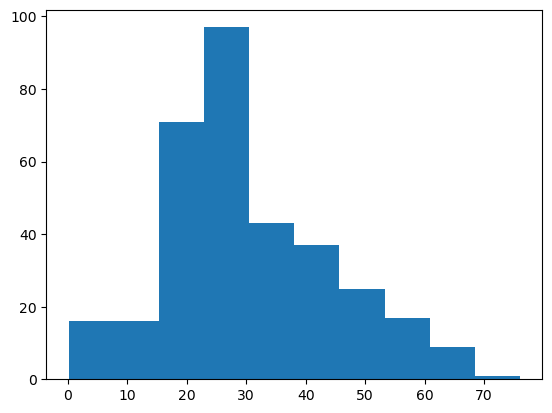

In [ ]:
plt.hist(df['Age'], bins=10) # histogram is used to show the distribution of a particular column bins is used to divide the data into 10 parts
# x asis is the range of the data and y axis is the frequency of the data

<Axes: xlabel='Age', ylabel='Density'>

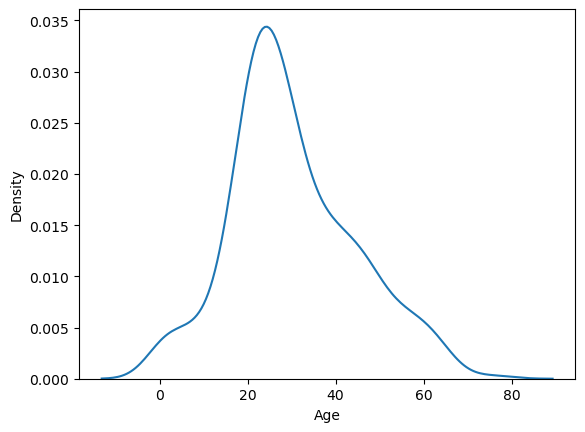

In [25]:
# probability density function
sns.kdeplot(df['Age']) # kdeplot is used to show the probability density function of the data , shade is used to fill the area under the curve

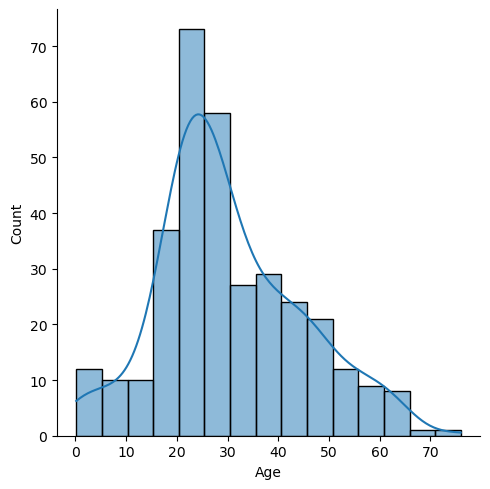

In [28]:
sns.displot(df['Age'], kde=True) # another way to plot the probability density function kde is used to show the probability density function


# Probability Density Function (PDF)

A Probability Density Function (PDF) is a statistical expression that defines a probability distribution for a continuous random variable. The PDF describes the likelihood of a random variable to take on a particular value. The area under the PDF curve represents the probability, and the total area under the curve is equal to 1.

### Key Points:
- The PDF is non-negative for all possible values of the random variable.
- The area under the PDF curve between two points represents the probability that the random variable falls within that interval.
- The PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value.

### Example:
Let's visualize the PDF of the 'Age' column from our dataset using a Kernel Density Estimate (KDE) plot.

```python
sns.kdeplot(df['Age'], shade=True)
plt.title('Probability Density Function of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
```

<Axes: ylabel='Density'>

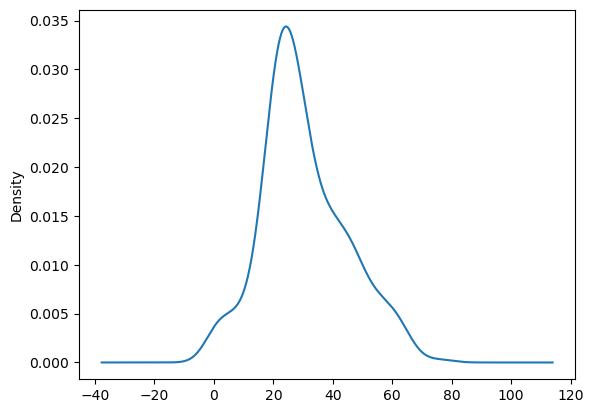

In [ ]:
df['Age'].plot(kind='kde') # another way to plot the probability density function

In [33]:
#min 
print(df['Age'].min())
# max
print(df['Age'].max())
# mean
print(df['Age'].mean())
# median
print(df['Age'].median())

0.17
76.0
30.272590361445783
27.0


In [35]:
# skew using pandas
print(df['Age'].skew())
# output if +ve then right skewed if -ve then left skewed

0.4573612871503845
